# Churn Modelling
Dataset: https://www.kaggle.com/aakash50897/churn-modellingcsv

In [90]:
import pandas as pd

In [91]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [92]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [94]:
X['Geography'].unique(), X['Gender'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [95]:
y.unique()

array([1, 0])

In [96]:
# creating dummy variables
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [97]:
X = pd.concat([X,geography,gender],axis=1)
X = X.drop(columns=['Geography','Gender'],axis=1)

In [98]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [99]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [100]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [102]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [103]:
model = Sequential()

# first hidden layer - 6 hidden neurons
model.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu',input_dim=11))
model.add(Dropout(0.2))

# second hidden layer - 6 hidden neurons
model.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.2))

# output layer - 1 neurons (binary classification)
model.add(Dense(units=1, kernel_initializer='glorot_uniform',activation='sigmoid'))

# compiling model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 6)                 72        
_________________________________________________________________
dropout_8 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_9 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [105]:
model_history = model.fit(X_train, y_train, validation_split=0.1, batch_size=10, epochs=100)

Epoch 1/100
720/720 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7613 - val_loss: 0.4728 - val_accuracy: 0.7950
Epoch 2/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4920 - accuracy: 0.7961 - val_loss: 0.4468 - val_accuracy: 0.7950
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4719 - accuracy: 0.7961 - val_loss: 0.4338 - val_accuracy: 0.7950
Epoch 4/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4634 - accuracy: 0.7961 - val_loss: 0.4304 - val_accuracy: 0.7950
Epoch 5/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4569 - accuracy: 0.7961 - val_loss: 0.4244 - val_accuracy: 0.7950
Epoch 6/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4514 - accuracy: 0.7975 - val_loss: 0.4204 - val_accuracy: 0.7962
Epoch 7/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4471 - accuracy: 0.8010 - val_loss: 0.4148 - val_accuracy: 0.8062

In [106]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [107]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
print(accuracy_score(y_pred,y_test))

0.833


In [109]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,1583,12
1,322,83


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


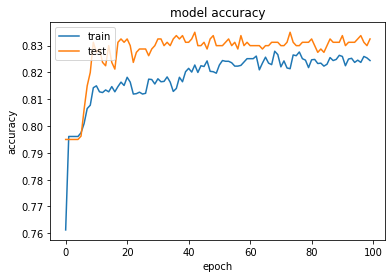

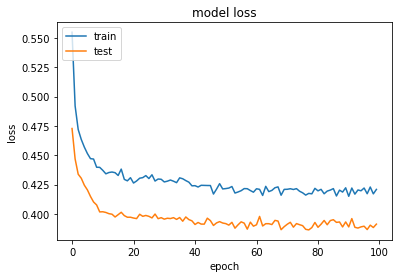

In [110]:
import matplotlib.pyplot as plt

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()